<a href="https://colab.research.google.com/github/AmarNarayanDwivedi/Statistics-and-EDA-for-ML/blob/main/Outliers-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
data = pd.read_csv('/raw_sales.csv')

In [3]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [17]:
#Function to Deletion OUtliers

def find_anomalies(data):
  anomalies = []

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomaly_cut_off = random_data_std *3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  #Generate Outliers
  for outliers in data:
    if outliers > upper_limit or outliers < lower_limit :
      anomalies.append(outliers)
      return anomalies


In [13]:
data.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [19]:
list_1 = find_anomalies(data['price'])
len(data)

29580

In [20]:
data.price.skew()

4.312009366902366

<Axes: xlabel='price', ylabel='Density'>

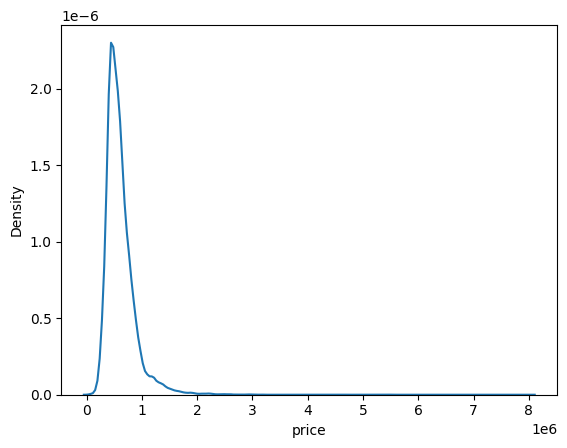

In [21]:
import seaborn as sns
sns.kdeplot(data.price)

In [24]:
 data['price_transform'] = np.log(data.price)
 data.price_transform.skew()

0.4731646269984763

In [29]:
list2 = find_anomalies(data.price_transform)
len(list2)

1

<Axes: xlabel='price_transform', ylabel='Density'>

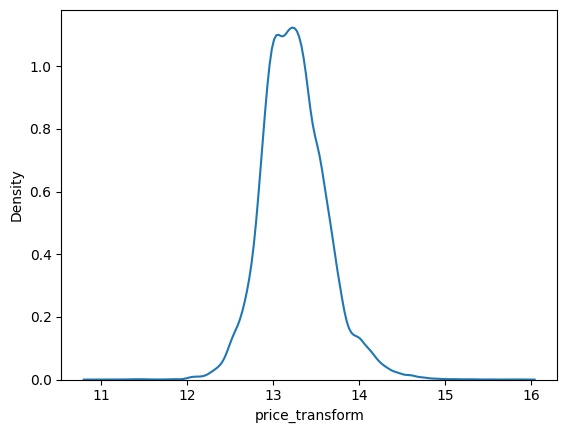

In [28]:
sns.kdeplot(data.price_transform)

In [33]:
data['price_transform2'] = np.log(data.price_transform)
data['price_transform2'].skew()

0.33092530655758573

# New Section

In [34]:
list3 = find_anomalies(data.price_transform2)
len(list3)

1

<Axes: xlabel='price_transform2', ylabel='Density'>

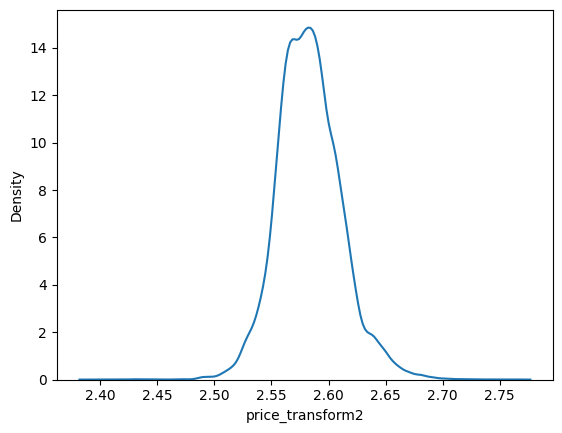

In [35]:
sns.kdeplot(data.price_transform2)

##Boxplots

<Axes: >

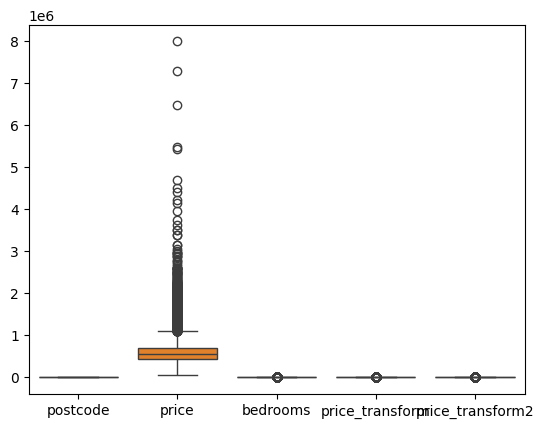

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)